In [ ]:
# Muhammet Mustafa SAĞLAM / EEM / FSMVU / https://www.linkedin.com/in/mustafasağlam/

# **2.Section - Importing Required Libraries**

In [3]:
# Gerekli kütüphaneleri import ediyoruz.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *

In [5]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **3.Section - Perform An Exploratory Data Analysis**

### **3.1 Section**

**Bmi (Vücut Kitle İndeksi) Dağılımını İnceleme**

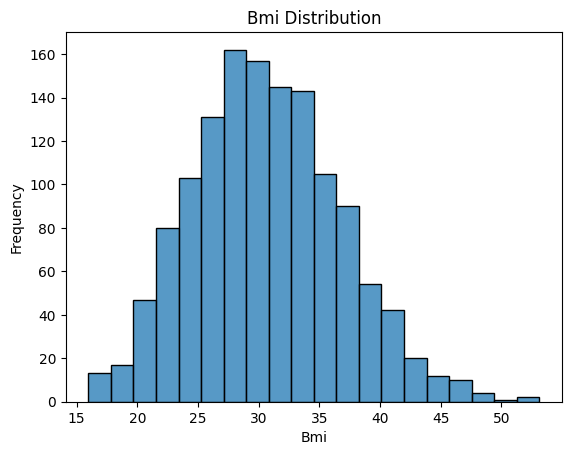

In [8]:
sns.histplot(data=df, x="bmi", bins=20)
plt.title("Bmi Distribution")
plt.xlabel("Bmi")
plt.ylabel("Frequency")
plt.show()

**"smoker" ile "charges" Arasındaki İlişkiyi İnceleme**

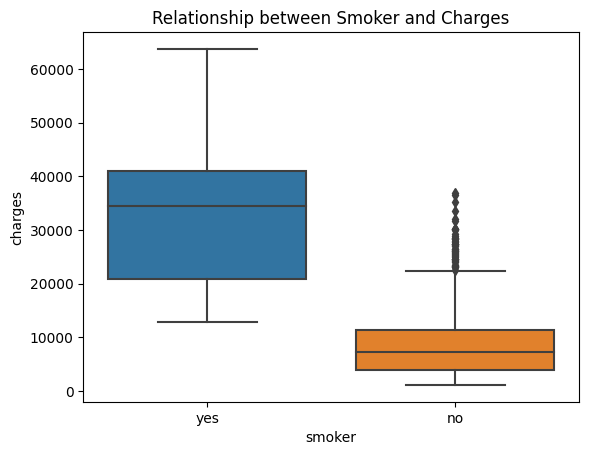

In [9]:
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Relationship between Smoker and Charges")
plt.show()

**"smoker" ile "region" Arasındaki İlişkiyi İnceleme**

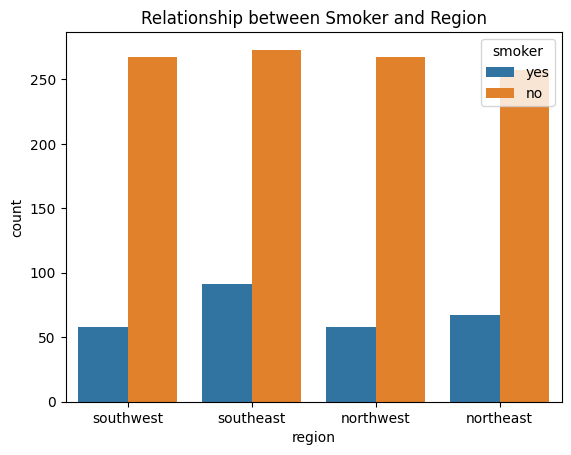

In [10]:
# İki kategorik değişkenin kesişimi için countplot kullanmalıyız.
sns.countplot(data=df, x="region", hue="smoker")
plt.title("Relationship between Smoker and Region")
plt.show()

**"bmi" ve "sex" İlişkisini İnceleme**

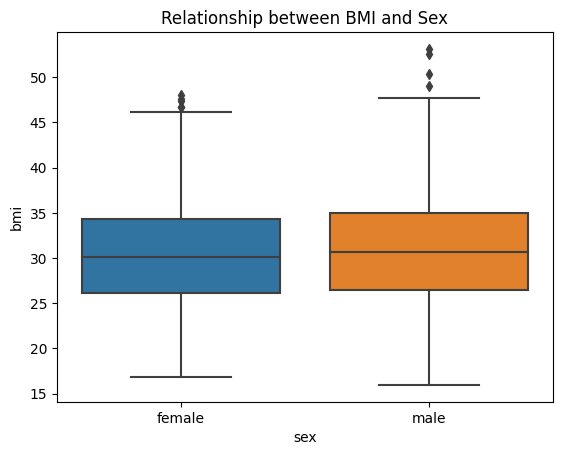

In [11]:
sns.boxplot(data=df, x="sex", y="bmi")
plt.title("Relationship between BMI and Sex")
plt.show()

**En Fazla "Children" değerine Sahip "Region"ı Bulma**

In [12]:
region_with_most_children = df.groupby("region")["children"].sum().idxmax()
print("Region with the most children:", region_with_most_children)

Region with the most children: southeast


**"age" ve "bmi" İlişkisini İnceleme**

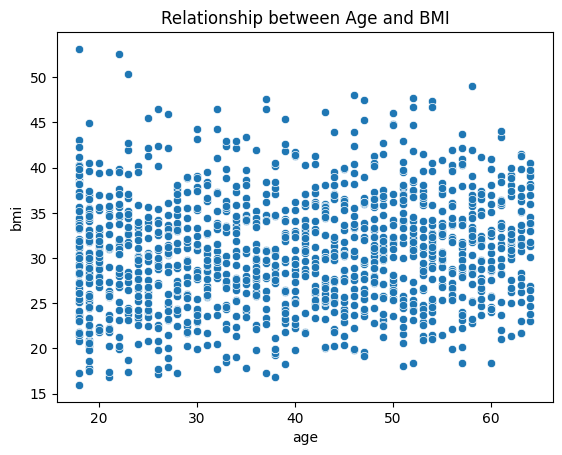

In [13]:
# Sayısal ve sürekli değişken arasındaki ilişki için scatterplot kullanmak gerekiyor.
sns.scatterplot(data=df, x="age", y="bmi")
plt.title("Relationship between Age and BMI")
plt.show()

**"bmi" ile "children" Arasındaki İlişkiyi İnceleme**

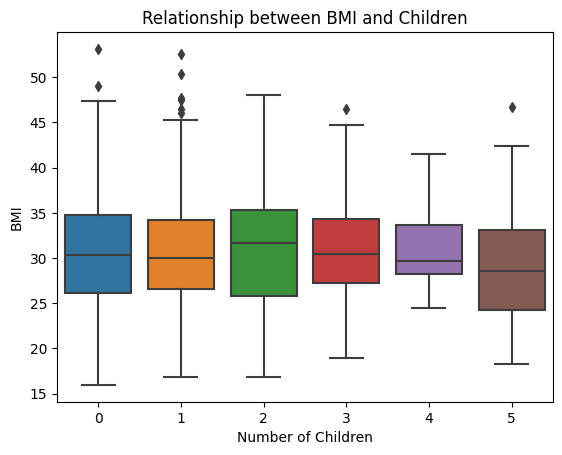

In [14]:
sns.boxplot(data=df, x="children", y="bmi")
plt.title("Relationship between BMI and Children")
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.show()

**"bmi" Değerlerinde Aykırı Değer Olup Olmadığını İnceleme**

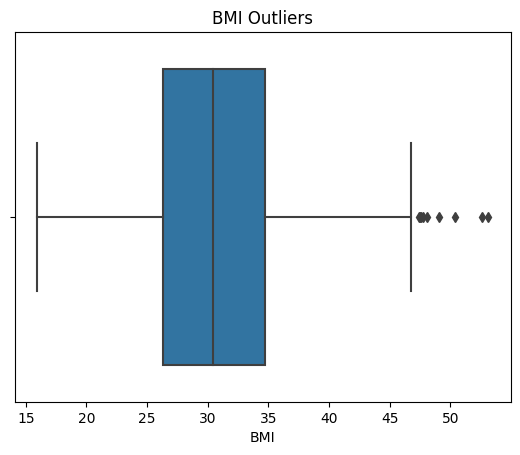

In [15]:
sns.boxplot(data=df, x="bmi")
plt.title("BMI Outliers")
plt.xlabel("BMI")
plt.show()

**"bmi" ile "charges" Arasındaki İlişkiyi İnceleme**

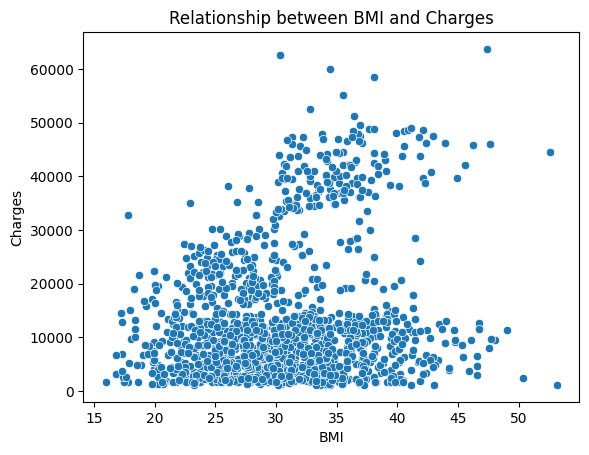

In [16]:
sns.scatterplot(data=df, x="bmi", y="charges")
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

**"region", "smoker" ve "bmi" İlişkisini Çubuk Grafiği ile İnceleme**

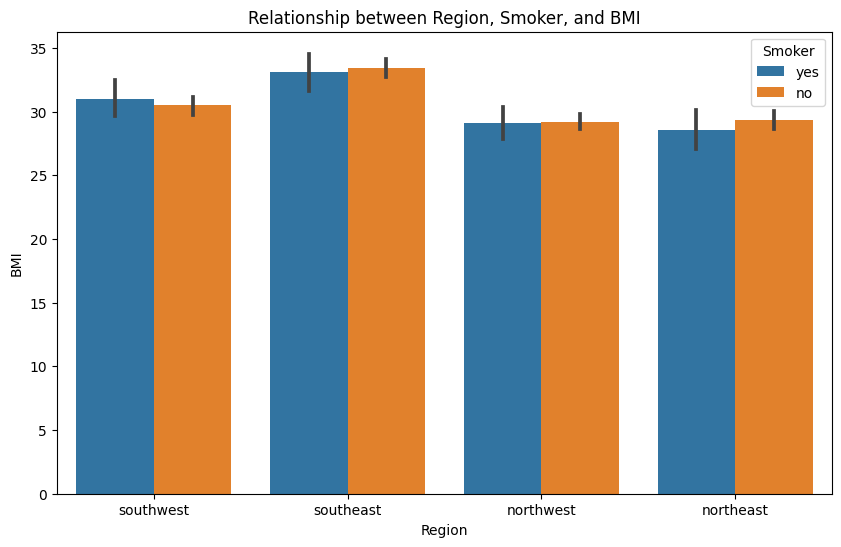

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="region", y="bmi", hue="smoker")
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
plt.show()


### **3.2 Section**

**Sigara İçenlerin Yaş Dağılımı**

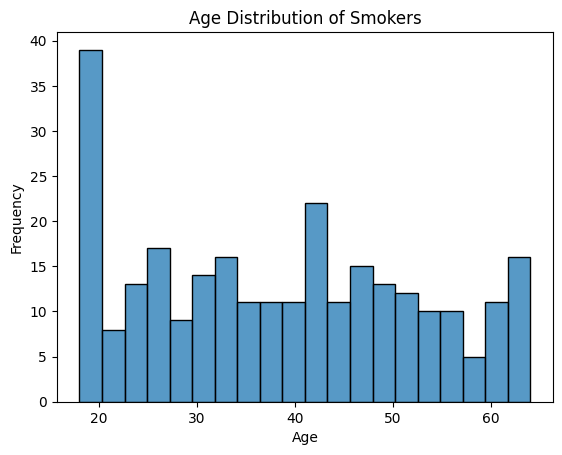

In [18]:
sns.histplot(data=df[df["smoker"] == "yes"], x="age", bins=20) # Burada histogram kullandık.
plt.title("Age Distribution of Smokers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**Sigara İçen ve İçmeyenlerin Cinsiyete Göre Dağılımı**

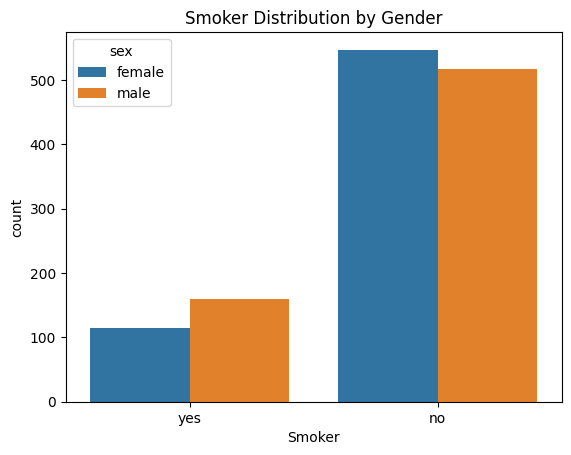

In [19]:
sns.countplot(data=df, x="smoker", hue="sex")
plt.title("Smoker Distribution by Gender")
plt.xlabel("Smoker")
plt.show()

**Bölgelere Göre Ortalama Yaş**

<ipython-input-20-9c44643ac5dc>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="region", y="age", ci=None)


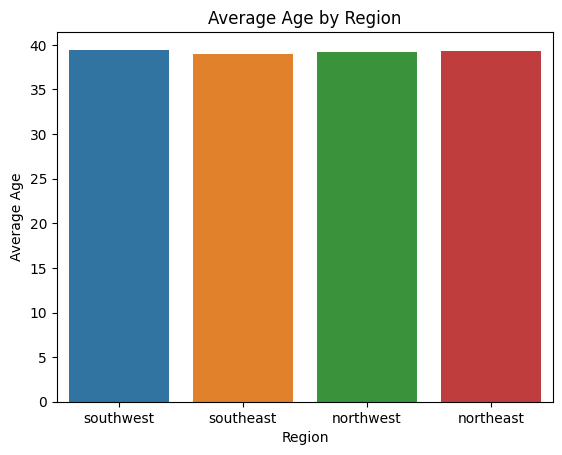

In [20]:
sns.barplot(data=df, x="region", y="age", ci=None)
plt.title("Average Age by Region")
plt.xlabel("Region")
plt.ylabel("Average Age")
plt.show()

**Sigara İçme Durumu ve Çocuk Sayısı İlişkisi**

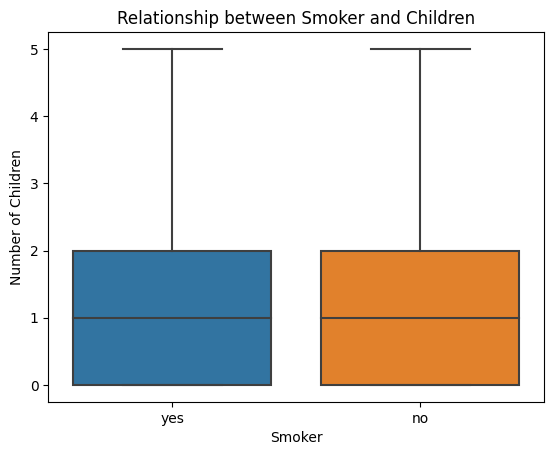

In [21]:
sns.boxplot(data=df, x="smoker", y="children")
plt.title("Relationship between Smoker and Children")
plt.xlabel("Smoker")
plt.ylabel("Number of Children")
plt.show()

**Bölgelere Göre Ücret Dağılımı**

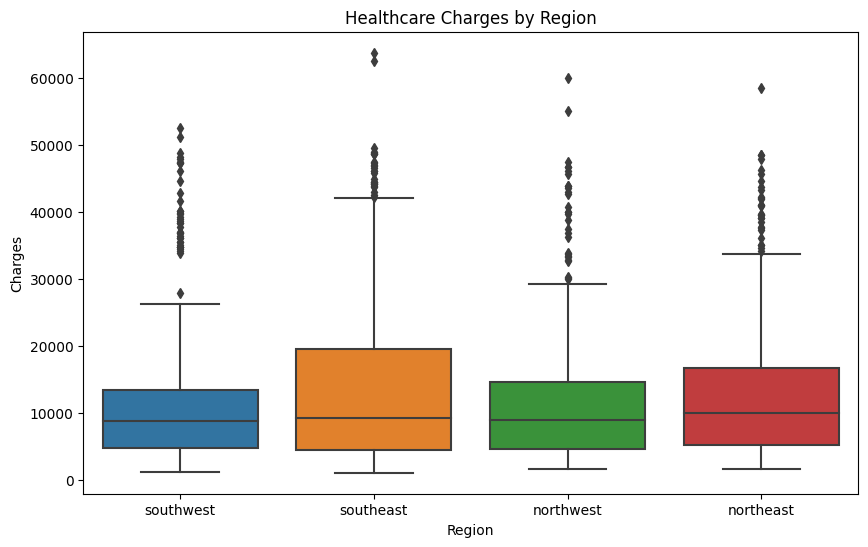

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="region", y="charges")
plt.title("Healthcare Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

# **4. Section - Data Preprocessing**

In [23]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### **Öncelikle sutunlarda ne çeşit verilerin olduğunu sipesifik olarak görmek istedim.**

In [26]:
age = df['age'].unique()
age

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [27]:
sex = df['sex'].unique()
sex

array(['female', 'male'], dtype=object)

In [ ]:
children = df['children'].unique()
children

array([0, 1, 3, 2, 5, 4])

In [ ]:
smoker =  df['smoker'].unique()
smoker

array(['yes', 'no'], dtype=object)

In [ ]:
region = df['region'].unique()
region

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## **Ardından ise encoding yöntemleri test yöntemlerini uyguladım.**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#'sex' ve 'smoker' için Label Encoding (Sebebi: 2 değer var, rahat yapılacaktır.)
label_columns = ['sex', 'smoker']
label_encoder = LabelEncoder()
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

# 'region' için One-Hot Encoding (Sebebi: 4 değer var, daha uygun yapılacaktır.)
df_new = pd.get_dummies(df, columns=['region'], drop_first=False)
df_new

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ölçeklemek için'bmi' ve 'charges' sütunları)
columns_to_scale = ['bmi', 'charges']

# Ölçekleme aşaması
df_final = df_new.copy()
df_final[columns_to_scale] = scaler.fit_transform(df_final[columns_to_scale])

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop('charges', axis=1)
y = df_final['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_final


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,0.321227,0,1,0.251611,0,0,0,1
1,18,1,0.479150,1,0,0.009636,0,0,1,0
2,28,1,0.458434,3,0,0.053115,0,0,1,0
3,33,1,0.181464,0,0,0.333010,0,1,0,0
4,32,1,0.347592,0,0,0.043816,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,0.403820,3,0,0.151299,0,1,0,0
1334,18,0,0.429379,0,0,0.017305,1,0,0,0
1335,18,0,0.562012,0,0,0.008108,0,0,1,0
1336,21,0,0.264730,0,0,0.014144,0,0,0,1


# **5. Section - Model Selection**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
X = df_final.drop('charges', axis=1)
y = df_final['charges']

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Support Vector Machine', SVR())
]

for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} RMSE Scores: {rmse_scores}")
    print(f"{name} Mean RMSE: {np.mean(rmse_scores)}\n")


Linear Regression RMSE Scores: [0.09717886 0.09855442 0.09109965 0.10054993 0.09725796]
Linear Regression Mean RMSE: 0.09692816495566325

Decision Tree RMSE Scores: [0.09859878 0.1076471  0.10081653 0.10255329 0.10779356]
Decision Tree Mean RMSE: 0.1034818526356855

Support Vector Machine RMSE Scores: [0.14928511 0.13736554 0.1490059  0.14665477 0.1522702 ]
Support Vector Machine Mean RMSE: 0.14691630244908516



### **Linear Regression modelini seçtim.**

# **6. Section - Hyper-parameter Optimization**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LinearRegression()

In [ ]:
# Grid Search için hiper-parametre kombinasyonlarını belirleme
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [1, -1],
    'positive': [True, False]
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error') #Grid objesini oluşturdum.

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error') # Grid Search objesi oluşturma

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, -1],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Parameters:", grid_search.best_params_) # En iyi hiper-parametre kombinasyonunu elde etme
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}
Best RMSE: 0.09819342453312577


# **7. Section - Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optimize edilmiş modelin tahminlerini yapma
y_pred = grid_search.predict(X_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R^2 Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 0.008561493743322398
Root Mean Squared Error: 0.09252834021705132
Mean Absolute Error: 0.06675352508811491
R^2 Score: 0.7835569786290857
